# Exploratory Data Analysis

https://artefacts.ceda.ac.uk/badc_datadocs/surface/code.html

#### Import Packages and Setting File Paths

In [2]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from urllib.request import urlretrieve
from scipy.stats import pearsonr

from config.config import DATA_PATH


In [4]:
pd.set_option('display.max_columns', None)

# Flights Data Overview

In [5]:
datetime_cols = ['scheduled_departure_datetime', 'scheduled_arrival_datetime', 'actual_departure_datetime', 'actual_arrival_datetime', 'scheduled_departure_datetime_utc', 'actual_departure_datetime_utc', 'scheduled_arrival_datetime_utc', 'actual_arrival_datetime_utc']

flights = pd.read_csv(DATA_PATH + '/interim/flights_clean.csv', parse_dates=datetime_cols)
final_airports = pd.read_csv(DATA_PATH + '/interim/final_airports.csv')
airports_df = pd.read_csv(DATA_PATH + '/interim/airports.csv')

In [6]:
flights.shape

(7260941, 92)

In [7]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260941 entries, 0 to 7260940
Data columns (total 92 columns):
 #   Column                            Dtype              
---  ------                            -----              
 0   year                              int64              
 1   quarter                           int64              
 2   month                             int64              
 3   day_of_month                      int64              
 4   day_of_week                       int64              
 5   marketing_airline_id              int64              
 6   flight_number_marketing_airline   int64              
 7   operating_airline_id              int64              
 8   tail_number                       object             
 9   origin_airport_id                 int64              
 10  origin_city_market_id             int64              
 11  origin                            object             
 12  origin_state                      object             
 1

In [8]:
flights.head()

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,arr_del15,arrival_delay_groups,cancelled,diverted,scheduled_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,overnight_depature,overnight_arrival,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status,region_origin,division_origin,region_dest,division_dest
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,263.0,NaN,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaT,NaT,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaT,2023-08-07 11:00:00+00:00,NaT,0,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,15.714286,6.0,163.0,4.903614,-2.0,166.0,5.0,0.0,84.0,cancelled,cancelled,West,Mountain,South,South Atlantic
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,1.0,4.0,0,0,263.0,256.0,228.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,16.690476,7.0,163.0,5.819277,-1.0,166.0,5.0,0.0,84.0,delayed,delayed,West,Mountain,South,South Atlantic
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0.0,-1.0,0,0,258.0,256.0,232.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10 05:59:00+00:00,2023-08-10 10:00:00+00:00,2023-08-10 10:15:00+00:00,0,3228,23,late night,12.375000,1.5,76.0,5.000000,-6.0,69.0,3.0,0.0,8.0,15.185185,5.0,82.0,6.192308,0.5,69.0,4.0,0.0,27.0,16.710843,7.0,163.0,5.573171,-2.0,166.0,5.0,0.0,83.0,early,early,West,Mountain,South,South Atlantic
3,2023,3,8,10,4,20416,2252,20416,N532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-8.0,0.0,-1.0,12.0,7.0,-30.0,0.0,-2.0,0,0,258.0,236.0,217.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-10 23:10:00,2023-08-11 06:28:00,2023-08-10 23:02:00,2023-08-11 05:58:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-11 06:00:00+00:00,2023-08-11 06:02:00+00:00,2023-08-11 10:00:00+00:00,2023-08-11 09:58:00+00:00,0,3228,23,late night,10.111111,1

In [9]:
final_airports.shape

(20, 8)

In [10]:
final_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dest_state        20 non-null     object 
 1   destination_city  20 non-null     object 
 2   dest_airport_id   20 non-null     int64  
 3   total_flights     20 non-null     int64  
 4   total_cancelled   20 non-null     float64
 5   total_delays      20 non-null     int64  
 6   region            20 non-null     object 
 7   division          20 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.4+ KB


In [11]:
final_airports.head()

,dest_state,destination_city,dest_airport_id,total_flights,total_cancelled,total_delays,region,division
0,GA,Atlanta,10397,333384,2915.0,55727,South,South Atlantic
1,CO,Denver,11292,293676,4587.0,62805,West,Mountain
2,IL,Chicago,13930,290476,3932.0,56837,Midwest,East North Central
3,TX,Dallas/Fort Worth,11298,284704,4691.0,60305,South,West South Central
4,NC,Charlotte,11057,222710,1956.0,41535,South,South Atlantic


In [12]:
airports_df.head()

,AIRPORT_SEQ_ID,AIRPORT_ID,AIRPORT,DISPLAY_AIRPORT_NAME,DISPLAY_AIRPORT_CITY_NAME_FULL,AIRPORT_WAC,AIRPORT_STATE_NAME,AIRPORT_STATE_CODE,AIRPORT_STATE_FIPS,CITY_MARKET_ID,DISPLAY_CITY_MARKET_NAME_FULL,CITY_MARKET_WAC,LATITUDE,LONGITUDE,AIRPORT_START_DATE,AIRPORT_THRU_DATE,AIRPORT_IS_CLOSED,AIRPORT_IS_LATEST,TIMEZONE
0,1000101,10001,01A,Afognak Lake Airport,"Afognak Lake, AK",1,Alaska,AK,2.0,30001,"Afognak Lake, AK",1,58.109444,-152.906667,7/1/2007 12:00:00 AM,NaN,0,1,America/Anchorage
1,1000301,10003,03A,Bear Creek Mining Strip,"Granite Mountain, AK",1,Alaska,AK,2.0,30003,"Granite Mountain, AK",1,65.548056,-161.071667,7/1/2007 12:00:00 AM,NaN,0,1,America/Anchorage
2,1000401,10004,04A,Lik Mining Camp,"Lik, AK",1,Alaska,AK,2.0,30004,"Lik, AK",1,68.083333,-163.166667,7/1/2007 12:00:00 AM,NaN,0,1,America/Nome
3,1000501,10005,05A,Little Squaw Airport,"Little Squaw, AK",1,Alaska,AK,2.0,30005,"Little Squaw, AK",1,67.570000,-148.183889,8/1/2007 12:00:00 AM,NaN,0,1,America/Anchorage
4,1000601,10006,06A,Kizhuyak Bay,"Kizhuyak, AK",1,Alaska,AK,2.0,30006,"Kizhuyak, AK",1,57.745278,-152.882778,10/1/2007 12:00:00 AM,NaN,0,1,America/Anchorage


In [13]:
airports_geo = final_airports.merge(airports_df[['DISPLAY_AIRPORT_NAME', 'AIRPORT', 'AIRPORT_ID', 'LATITUDE', 'LONGITUDE']], left_on='dest_airport_id', right_on='AIRPORT_ID')
airports_geo

,dest_state,destination_city,dest_airport_id,total_flights,total_cancelled,total_delays,region,division,DISPLAY_AIRPORT_NAME,AIRPORT,AIRPORT_ID,LATITUDE,LONGITUDE
0,GA,Atlanta,10397,333384,2915.0,55727,South,South Atlantic,Hartsfield-Jackson Atlanta International,ATL,10397,33.636667,-84.427778
1,CO,Denver,11292,293676,4587.0,62805,West,Mountain,Denver International,DEN,11292,39.861667,-104.673056
2,IL,Chicago,13930,290476,3932.0,56837,Midwest,East North Central,Chicago O'Hare International,ORD,13930,41.976944,-87.908056
3,TX,Dallas/Fort Worth,11298,284704,4691.0,60305,South,West South Central,Dallas/Fort Worth International,DFW,11298,32.897222,-97.037778
4,NC,Charlotte,11057,222710,1956.0,41535,South,South Atlantic,Charlotte Douglas International,CLT,11057,35.213611,-80.949167
5,CA,Los Angeles,12892,193649,1680.0,40075,West,Pacific,Los Angeles International,LAX,12892,33.942500,-118.408056
6,NV,Las Vegas,12889,189153,2340.0,48933,West,Mountain,Harry Reid International,LAS,12889,36.080000,-115.152222
7,WA,Seattle,14747,179608,1291.0,28950,West,Pacific,Seattle/Tacoma International,SEA,14747,47.450000,-122.311667
8,AZ,Phoenix,14107,177959,1270.0,35485,West,Mountain,Phoenix Sky Harbor International,PHX,14107,33.434167,-112.011667
9,NY,New York,12953,161811,4553.0,31127,Northeast,Middle Atlantic,LaGuardia,LGA,12953,40.777222,-73.872500


In [14]:
airports_geo[['AIRPORT', 'AIRPORT_ID', 'DISPLAY_AIRPORT_NAME', 'LATITUDE', 'LONGITUDE']].to_csv(DATA_PATH + '/interim/weather_geos.csv', index=False)

In [15]:
airports_list = airports_geo['AIRPORT'].unique().tolist()
airports_list
flights_filtered = flights[flights['dest'].isin(airports_list)]
flights_filtered.shape
flights_filtered = flights_filtered[flights_filtered['origin'].isin(airports_list)]

In [16]:
flights_filtered.shape

(1493764, 92)

In [17]:
flights_filtered.head()

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,arr_del15,arrival_delay_groups,cancelled,diverted,scheduled_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,overnight_depature,overnight_arrival,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status,region_origin,division_origin,region_dest,division_dest
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,263.0,NaN,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaT,NaT,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaT,2023-08-07 11:00:00+00:00,NaT,0,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,15.714286,6.0,163.0,4.903614,-2.0,166.0,5.0,0.0,84.0,cancelled,cancelled,West,Mountain,South,South Atlantic
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,1.0,4.0,0,0,263.0,256.0,228.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,16.690476,7.0,163.0,5.819277,-1.0,166.0,5.0,0.0,84.0,delayed,delayed,West,Mountain,South,South Atlantic
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0.0,-1.0,0,0,258.0,256.0,232.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10 05:59:00+00:00,2023-08-10 10:00:00+00:00,2023-08-10 10:15:00+00:00,0,3228,23,late night,12.375000,1.5,76.0,5.000000,-6.0,69.0,3.0,0.0,8.0,15.185185,5.0,82.0,6.192308,0.5,69.0,4.0,0.0,27.0,16.710843,7.0,163.0,5.573171,-2.0,166.0,5.0,0.0,83.0,early,early,West,Mountain,South,South Atlantic
3,2023,3,8,10,4,20416,2252,20416,N532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-8.0,0.0,-1.0,12.0,7.0,-30.0,0.0,-2.0,0,0,258.0,236.0,217.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-10 23:10:00,2023-08-11 06:28:00,2023-08-10 23:02:00,2023-08-11 05:58:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-11 06:00:00+00:00,2023-08-11 06:02:00+00:00,2023-08-11 10:00:00+00:00,2023-08-11 09:58:00+00:00,0,3228,23,late night,10.111111,1

In [18]:
def read_and_combine_csv(base_path, data_folder):
    """
    Reads multiple CSV files from a specified directory and combines them into a single DataFrame.

    Args:
    base_path (str): The base directory path where data folders are stored.
    data_folder (str): The folder name containing the CSV files to read.

    Returns:
    DataFrame: A combined DataFrame containing data from all CSV files in the specified directory.
    """
    # Construct the full path to the folder containing CSV files
    folder_path = os.path.join(base_path, data_folder)
    
    # Initialize an empty list to store individual DataFrames
    dataframes_list = []
    
    # Iterate through each file in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, low_memory=False)
            dataframes_list.append(df)
    
    # Concatenate all DataFrames in the list into one DataFrame
    combined_df = pd.concat(dataframes_list, ignore_index=True)
    
    return combined_df

In [19]:
weather = read_and_combine_csv(DATA_PATH + '/interim/', 'hourly_weather_data')

In [20]:
weather.head()

,time,temperature_2m,precipitation,snowfall,snow_depth,weather_code,visibility,wind_speed_10m,wind_direction_10m,wind_gusts_10m,airport,airport_id
0,2023-01-01 00:00:00,49.3,0.000,0.0,0.0,45,656.168,1.3,90,2.9,LGA,12953
1,2023-01-01 01:00:00,49.7,0.043,0.0,0.0,55,656.168,0.9,76,2.2,LGA,12953
2,2023-01-01 02:00:00,50.8,0.055,0.0,0.0,61,656.168,2.0,243,3.6,LGA,12953
3,2023-01-01 03:00:00,50.8,0.043,0.0,0.0,55,28543.307,0.6,135,4.3,LGA,12953
4,2023-01-01 04:00:00,52.7,0.000,0.0,0.0,3,40026.246,3.8,173,10.3,LGA,12953


In [21]:
weather.shape

(175200, 12)

In [22]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   time                175200 non-null  object 
 1   temperature_2m      175200 non-null  float64
 2   precipitation       175200 non-null  float64
 3   snowfall            175200 non-null  float64
 4   snow_depth          175200 non-null  float64
 5   weather_code        175200 non-null  int64  
 6   visibility          175200 non-null  float64
 7   wind_speed_10m      175200 non-null  float64
 8   wind_direction_10m  175200 non-null  int64  
 9   wind_gusts_10m      175200 non-null  float64
 10  airport             175200 non-null  object 
 11  airport_id          175200 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 16.0+ MB


In [23]:
weather['time'] = pd.to_datetime(weather['time'], utc=True)

In [24]:
weather.head()

,time,temperature_2m,precipitation,snowfall,snow_depth,weather_code,visibility,wind_speed_10m,wind_direction_10m,wind_gusts_10m,airport,airport_id
0,2023-01-01 00:00:00+00:00,49.3,0.000,0.0,0.0,45,656.168,1.3,90,2.9,LGA,12953
1,2023-01-01 01:00:00+00:00,49.7,0.043,0.0,0.0,55,656.168,0.9,76,2.2,LGA,12953
2,2023-01-01 02:00:00+00:00,50.8,0.055,0.0,0.0,61,656.168,2.0,243,3.6,LGA,12953
3,2023-01-01 03:00:00+00:00,50.8,0.043,0.0,0.0,55,28543.307,0.6,135,4.3,LGA,12953
4,2023-01-01 04:00:00+00:00,52.7,0.000,0.0,0.0,3,40026.246,3.8,173,10.3,LGA,12953


In [25]:
flights_filtered.head()

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,arr_del15,arrival_delay_groups,cancelled,diverted,scheduled_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,overnight_depature,overnight_arrival,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status,region_origin,division_origin,region_dest,division_dest
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,263.0,NaN,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaT,NaT,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaT,2023-08-07 11:00:00+00:00,NaT,0,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,15.714286,6.0,163.0,4.903614,-2.0,166.0,5.0,0.0,84.0,cancelled,cancelled,West,Mountain,South,South Atlantic
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,1.0,4.0,0,0,263.0,256.0,228.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,16.690476,7.0,163.0,5.819277,-1.0,166.0,5.0,0.0,84.0,delayed,delayed,West,Mountain,South,South Atlantic
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0.0,-1.0,0,0,258.0,256.0,232.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10 05:59:00+00:00,2023-08-10 10:00:00+00:00,2023-08-10 10:15:00+00:00,0,3228,23,late night,12.375000,1.5,76.0,5.000000,-6.0,69.0,3.0,0.0,8.0,15.185185,5.0,82.0,6.192308,0.5,69.0,4.0,0.0,27.0,16.710843,7.0,163.0,5.573171,-2.0,166.0,5.0,0.0,83.0,early,early,West,Mountain,South,South Atlantic
3,2023,3,8,10,4,20416,2252,20416,N532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-8.0,0.0,-1.0,12.0,7.0,-30.0,0.0,-2.0,0,0,258.0,236.0,217.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-10 23:10:00,2023-08-11 06:28:00,2023-08-10 23:02:00,2023-08-11 05:58:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-11 06:00:00+00:00,2023-08-11 06:02:00+00:00,2023-08-11 10:00:00+00:00,2023-08-11 09:58:00+00:00,0,3228,23,late night,10.111111,1

In [26]:
combined_df = flights_filtered.merge(weather, how='left', left_on=['scheduled_departure_datetime_utc', 'origin', 'origin_airport_id'], right_on=['time', 'airport', 'airport_id'])

In [27]:
combined_df

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,arr_del15,arrival_delay_groups,cancelled,diverted,scheduled_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,overnight_depature,overnight_arrival,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status,region_origin,division_origin,region_dest,division_dest,time,temperature_2m,precipitation,snowfall,snow_depth,weather_code,visibility,wind_speed_10m,wind_direction_10m,wind_gusts_10m,airport,airport_id
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,263.0,NaN,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaT,NaT,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaT,2023-08-07 11:00:00+00:00,NaT,0,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,15.714286,6.0,163.0,4.903614,-2.0,166.0,5.0,0.0,84.0,cancelled,cancelled,West,Mountain,South,South Atlantic,2023-08-07 07:00:00+00:00,87.6,0.0,0.0,0.0,0.0,293635.188,5.1,180.0,8.5,LAS,12889.0
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,1.0,4.0,0,0,263.0,256.0,228.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,16.690476,7.0,163.0,5.819277,-1.0,166.0,5.0,0.0,84.0,delayed,delayed,West,Mountain,South,South Atlantic,2023-08-08 07:00:00+00:00,89.7,0.0,0.0,0.0,0.0,293635.188,13.5,220.0,25.3,LAS,12889.0
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0.0,-1.0,0,0,258.0,256.0,232.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10 05:59:00+00:00,2023-08-10 10:00:00+00:00,2023-08-10 10:15:00+00:00,0,3228,23,late night,12.375000,1.5,76.0,5.000000,-6.0,69.0,3.0,0.0,8.0,15.185185,5.0,82.0,6.192308,0.5,69.0,4.0,0.0,27.0,16.710843,7.0,163.0,5.573171,-2.0,166.0,5.0,0.0,83.0,early,early,West,Mountain,South,South Atlantic,2023-08-10 06:00:00+00:00,91.9,0.0,0.0,0.0,3.0,234251.969,11.7,239.0,22.6,LAS,12889.0
3,2023,3,8,10,4,20416,2252,20416,N532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-8.0

In [28]:
combined_df = combined_df.merge(weather, how='left', left_on=['scheduled_arrival_datetime_utc', 'dest', 'dest_airport_id'], right_on=['time', 'airport', 'airport_id'], suffixes=['_origin', '_dest'])

In [29]:
combined_df.head()

,year,quarter,month,day_of_month,day_of_week,marketing_airline_id,flight_number_marketing_airline,operating_airline_id,tail_number,origin_airport_id,origin_city_market_id,origin,origin_state,dest_airport_id,dest_city_market_id,dest,dest_state,dep_delay,dep_del15,departure_delay_groups,taxi_out,taxi_in,arr_delay,arr_del15,arrival_delay_groups,cancelled,diverted,scheduled_elapsed_time,actual_elapsed_time,air_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,div_airport_landings,code_share_flight,origin_city,destination_city,scheduled_departure_datetime,scheduled_arrival_datetime,actual_departure_datetime,actual_arrival_datetime,overnight_depature,overnight_arrival,airline_mkt,airline_ops,origin_timezone,destination_timezone,scheduled_departure_datetime_utc,actual_departure_datetime_utc,scheduled_arrival_datetime_utc,actual_arrival_datetime_utc,is_holiday,route_id,hour_of_day,departure_window,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D,departure_status,arrival_status,region_origin,division_origin,region_dest,division_dest,time_origin,temperature_2m_origin,precipitation_origin,snowfall_origin,snow_depth_origin,weather_code_origin,visibility_origin,wind_speed_10m_origin,wind_direction_10m_origin,wind_gusts_10m_origin,airport_origin,airport_id_origin,time_dest,temperature_2m_dest,precipitation_dest,snowfall_dest,snow_depth_dest,weather_code_dest,visibility_dest,wind_speed_10m_dest,wind_direction_10m_dest,wind_gusts_10m_dest,airport_dest,airport_id_dest
0,2023,3,8,6,7,20416,2252,20416,N978NK,12889,32211,LAS,NV,11057,31057,CLT,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,263.0,NaN,NaN,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-06 23:59:00,2023-08-07 07:22:00,NaT,NaT,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-07 07:00:00+00:00,NaT,2023-08-07 11:00:00+00:00,NaT,0,3228,23,late night,5.125000,2.0,31.0,-5.000000,-6.0,16.0,3.0,0.0,8.0,15.518519,5.0,82.0,4.923077,0.5,62.0,4.0,0.0,27.0,15.714286,6.0,163.0,4.903614,-2.0,166.0,5.0,0.0,84.0,cancelled,cancelled,West,Mountain,South,South Atlantic,2023-08-07 07:00:00+00:00,87.6,0.0,0.0,0.0,0.0,293635.188,5.1,180.0,8.5,LAS,12889.0,2023-08-07 11:00:00+00:00,72.6,0.0,0.0,0.0,3.0,40026.246,4.2,196.0,8.5,CLT,11057.0
1,2023,3,8,7,1,20416,2252,20416,N974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,76.0,1.0,5.0,19.0,9.0,69.0,1.0,4.0,0,0,263.0,256.0,228.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,0,Las Vegas,Charlotte,2023-08-07 23:59:00,2023-08-08 07:22:00,2023-08-08 01:15:00,2023-08-08 08:31:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-08 07:00:00+00:00,2023-08-08 08:15:00+00:00,2023-08-08 11:00:00+00:00,2023-08-08 12:31:00+00:00,0,3228,23,late night,14.000000,2.0,76.0,4.714286,-6.0,69.0,3.0,0.0,8.0,17.740741,5.0,82.0,7.961538,5.0,69.0,4.0,0.0,27.0,16.690476,7.0,163.0,5.819277,-1.0,166.0,5.0,0.0,84.0,delayed,delayed,West,Mountain,South,South Atlantic,2023-08-08 07:00:00+00:00,89.7,0.0,0.0,0.0,0.0,293635.188,13.5,220.0,25.3,LAS,12889.0,2023-08-08 11:00:00+00:00,70.0,0.0,0.0,0.0,3.0,42322.836,4.9,223.0,18.1,CLT,11057.0
2,2023,3,8,9,3,20416,2252,20416,N519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,-11.0,0.0,-1.0,14.0,10.0,-13.0,0.0,-1.0,0,0,258.0,256.0,232.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,0,Las Vegas,Charlotte,2023-08-09 23:10:00,2023-08-10 06:28:00,2023-08-09 22:59:00,2023-08-10 06:15:00,0,0,Spirit Air Lines,Spirit Air Lines,America/Los_Angeles,America/New_York,2023-08-10 06:00:00+00:00,2023-08-10

In [30]:
cols_to_drop = ['time_origin', 'airport_origin', 'airport_id_origin', 'time_dest', 'airport_dest', 'airport_id_dest']
combined_df = combined_df.drop(columns=cols_to_drop)

In [1]:
combined_df.head()

NameError: name 'combined_df' is not defined

In [32]:
combined_df.columns.to_list()

['year',
 'quarter',
 'month',
 'day_of_month',
 'day_of_week',
 'marketing_airline_id',
 'flight_number_marketing_airline',
 'operating_airline_id',
 'tail_number',
 'origin_airport_id',
 'origin_city_market_id',
 'origin',
 'origin_state',
 'dest_airport_id',
 'dest_city_market_id',
 'dest',
 'dest_state',
 'dep_delay',
 'dep_del15',
 'departure_delay_groups',
 'taxi_out',
 'taxi_in',
 'arr_delay',
 'arr_del15',
 'arrival_delay_groups',
 'cancelled',
 'diverted',
 'scheduled_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'distance',
 'distance_group',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'div_airport_landings',
 'code_share_flight',
 'origin_city',
 'destination_city',
 'scheduled_departure_datetime',
 'scheduled_arrival_datetime',
 'actual_departure_datetime',
 'actual_arrival_datetime',
 'overnight_depature',
 'overnight_arrival',
 'airline_mkt',
 'airline_ops',
 'origin_timezone',
 'destination_timezone',
 'scheduled_d

In [47]:
historical_performance_cols = [
    'dep_delay_mean_10D',
    'dep_delay_median_10D',
    'dep_delay_max_10D',
    'arr_delay_mean_10D',
    'arr_delay_median_10D',
    'arr_delay_max_10D',
    'cancelled_sum_10D',
    'div_airport_landings_sum_10D',
    'n_flights_10D',
    'dep_delay_mean_30D',
    'dep_delay_median_30D',
    'dep_delay_max_30D',
    'arr_delay_mean_30D',
    'arr_delay_median_30D',
    'arr_delay_max_30D',
    'cancelled_sum_30D',
    'div_airport_landings_sum_30D',
    'n_flights_30D',
    'dep_delay_mean_90D',
    'dep_delay_median_90D',
    'dep_delay_max_90D',
    'arr_delay_mean_90D',
    'arr_delay_median_90D',
    'arr_delay_max_90D',
    'cancelled_sum_90D',
    'div_airport_landings_sum_90D',
    'n_flights_90D',
    ]

historical_corr = combined_df[historical_performance_cols].corr()

<Axes: >

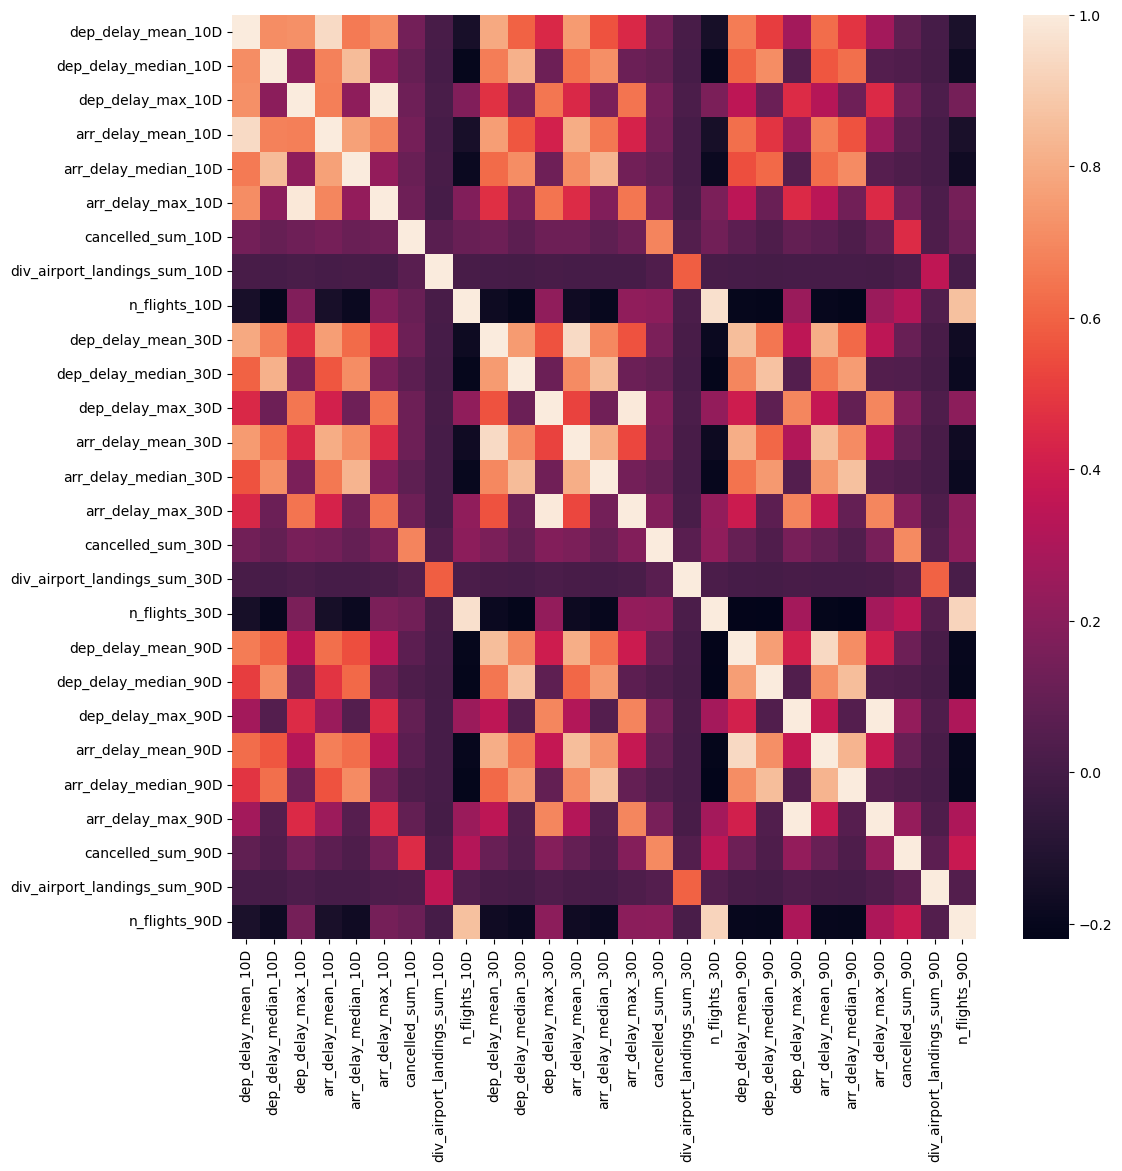

In [38]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(historical_corr)

In [48]:
upper = historical_corr.abs().where(np.triu(np.ones(historical_corr.shape), k=1).astype(bool))
upper

,dep_delay_mean_10D,dep_delay_median_10D,dep_delay_max_10D,arr_delay_mean_10D,arr_delay_median_10D,arr_delay_max_10D,cancelled_sum_10D,div_airport_landings_sum_10D,n_flights_10D,dep_delay_mean_30D,dep_delay_median_30D,dep_delay_max_30D,arr_delay_mean_30D,arr_delay_median_30D,arr_delay_max_30D,cancelled_sum_30D,div_airport_landings_sum_30D,n_flights_30D,dep_delay_mean_90D,dep_delay_median_90D,dep_delay_max_90D,arr_delay_mean_90D,arr_delay_median_90D,arr_delay_max_90D,cancelled_sum_90D,div_airport_landings_sum_90D,n_flights_90D
dep_delay_mean_10D,NaN,0.71218,0.719434,0.945276,0.657948,0.712457,0.141748,0.011038,0.143427,0.794101,0.595816,0.445806,0.749687,0.557257,0.442993,0.136852,0.009270,0.145632,0.663202,0.508963,0.275033,0.627987,0.482526,0.273206,0.080766,0.008539,0.129823
dep_delay_median_10D,NaN,NaN,0.208246,0.677463,0.849010,0.205726,0.102524,0.007792,0.201515,0.669853,0.818923,0.118656,0.634497,0.716379,0.117311,0.089928,0.005832,0.198434,0.600303,0.709999,0.050154,0.569546,0.629685,0.049149,0.033838,0.002757,0.172576
dep_delay_max_10D,NaN,NaN,NaN,0.673096,0.214836,0.989921,0.125011,0.016084,0.178013,0.474765,0.157260,0.650211,0.442670,0.165189,0.645926,0.153235,0.019561,0.165621,0.351598,0.115763,0.452280,0.327957,0.125040,0.449663,0.141935,0.025810,0.146032
arr_delay_mean_10D,NaN,NaN,NaN,NaN,0.770235,0.690796,0.144306,0.008776,0.141336,0.757327,0.568776,0.417004,0.804141,0.653049,0.425527,0.138439,0.008606,0.144231,0.632162,0.485317,0.249357,0.671783,0.558641,0.253166,0.073062,0.008178,0.134572
arr_delay_median_10D,NaN,NaN,NaN,NaN,NaN,0.232018,0.109192,0.009415,0.183007,0.618995,0.711464,0.124821,0.710065,0.824449,0.133591,0.098869,0.008024,0.182650,0.550574,0.615714,0.048226,0.624142,0.707816,0.052336,0.030015,0.004795,0.168127
arr_delay_max_10D,NaN,NaN,NaN,NaN,NaN,NaN,0.125420,0.008676,0.176428,0.470219,0.154381,0.645426,0.456360,0.179941,0.649224,0.153728,0.015349,0.164030,0.347024,0.112843,0.447585,0.337750,0.136322,0.448721,0.140524,0.023227,0.143290
cancelled_sum_10D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063695,0.106609,0.122126,0.071192,0.119877,0.119980,0.076583,0.120755,0.686935,0.046778,0.134769,0.073406,0.029175,0.091545,0.069841,0.031015,0.092133,0.452106,0.031962,0.118189
div_airport_landings_sum_10D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011336,0.006881,0.003480,0.009970,0.006511,0.006516,0.008143,0.035335,0.587187,0.012212,0.004381,0.002152,0.005591,0.005815,0.006720,0.004098,0.022966,0.352844,0.008028
n_flights_10D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176149,0.202788,0.221427,0.171896,0.192558,0.220573,0.211745,0.021288,0.963413,0.203003,0.210192,0.249222,0.197951,0.207730,0.249563,0.321117,0.039812,0.863883
dep_delay_mean_30D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.747929,0.561507,0.943348,0.697946,0.557970,0.166096,0.010539,0.184169,0.853826,0.650258,0.350501,0.807998,0.615755,0.348184,0.108931,0.010385,0.170058


In [50]:
hist_cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
hist_cols_to_drop

['arr_delay_mean_10D',
 'arr_delay_max_10D',
 'arr_delay_mean_30D',
 'arr_delay_max_30D',
 'n_flights_30D',
 'dep_delay_mean_90D',
 'dep_delay_median_90D',
 'arr_delay_mean_90D',
 'arr_delay_median_90D',
 'arr_delay_max_90D',
 'n_flights_90D']

In [51]:
combined_df = combined_df.drop(columns=hist_cols_to_drop)

### Outliers

(-45.0, 80.0)

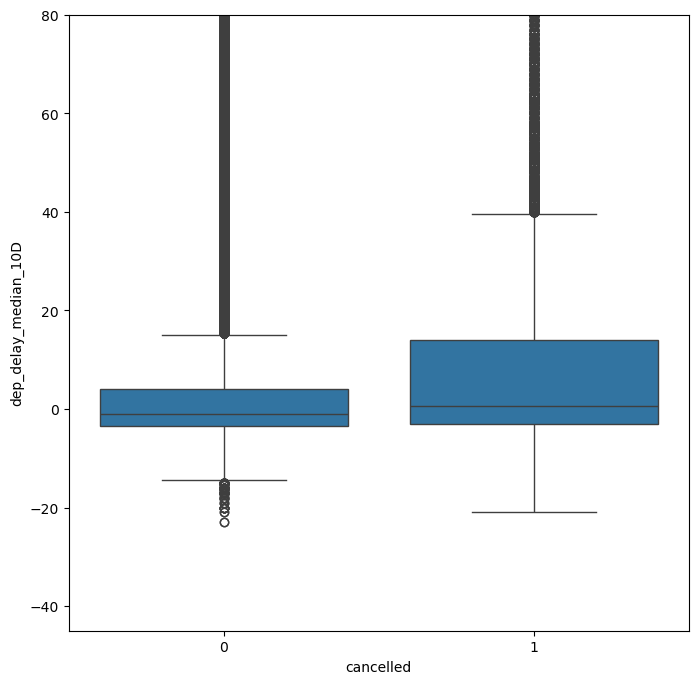

In [53]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=combined_df, x='cancelled', y='dep_delay_median_10D')
ax.set_ylim(-45, 80)

# Save DF

In [52]:
combined_df.to_csv(DATA_PATH + '/preprocessed/airline_performance.csv', index=False)